<a href="https://colab.research.google.com/github/thdgmltjd123/Assignment01/blob/master/Assignment06_20150711.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#구글 드라이브와 코랩 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [69]:
import numpy as np
import matplotlib.pyplot as plt

# import data with numpy
data_train  = np.loadtxt('/content/drive/My Drive/Colab Notebooks/training.txt', delimiter=',')
data_test   = np.loadtxt('/content/drive/My Drive/Colab Notebooks/testing.txt', delimiter=',')

# number of training data
number_data_train   = data_train.shape[0] 
number_data_test    = data_test.shape[0]

# training data
x1_train            = data_train[:,0] # feature 1
x2_train            = data_train[:,1] # feature 2
y_train             = data_train[:,2].reshape(-1,1)
idx_class0_train    = data_train[data_train[:,2]==0] # index of class0
idx_class1_train    = data_train[data_train[:,2]==1] # index of class1

# testing data
x1_test             = data_test[:,0] # feature 1
x2_test             = data_test[:,1] # feature 2
y_test              = data_test[:,2].reshape(-1,1)
idx_class0_test     = data_test[data_test[:,2]==0] # index of class0
idx_class1_test     = data_test[data_test[:,2]==1] # index of class1


In [97]:
# sigmoid fuction
def sigmoid(z):
  f = 1 / (1 + np.exp(-z))
  return f

# define Z
def generated_X(x,y):
  n = len(y)
  Z = np.ones([n, 100])
  cnt = 1
  for i in range(10):
    for j in range(10):
      Z[:,cnt] = (x**i) * (y**j)
      if cnt < 99:
        cnt += 1
  return Z

def f_pred(X,w):
  p = sigmoid(np.dot(X,w))
  return p

def loss_ce(y_pred,y,lamda,w):
  n = len(y)
  loss = np.mean(-y * np.log(y_pred + 1e-7) - (1 - y) * np.log(1 - y_pred + 1e-7)) + ((lamda * np.sum(w**2)) / 2)
  return loss

def grad_loss(y_pred,y,X,lamda,w):
  n = len(y)
  grad = ((2 * np.dot(X.T,y_pred - y)) / n) + lamda * w
  return grad

def grad_desc(X_train, X_test, y_train, y_test, w_init, tau, max_iter, lamda):

  L_iters_train = np.zeros([max_iter])
  L_iters_test = np.zeros([max_iter])

  w = w_init
  for i in range(max_iter):
    y_pred_train = f_pred(X_train, w)
    y_pred_test = f_pred(X_test, w)
    grad_f = grad_loss(y_pred_train, y_train, X_train, lamda, w)
    w = w - tau * grad_f
    L_iters_train[i] = loss_ce(y_pred_train,y_train,lamda,w)
    L_iters_test[i] = loss_ce(y_pred_test,y_test,lamda,w)
    
  return w, L_iters_train, L_iters_test

In [120]:
np.random.seed(777)
w_init = np.random.normal(0,3,(100,1))
X_train = generated_X(x1_train,x2_train)
X_test = generated_X(x1_test,x2_test)
tau = 1e-1
lamda = 1e-2
max_iter = 30000
w, L_iters_train,L_iters_test = grad_desc(X_train, X_test, y_train, y_test, w_init, tau, max_iter, lamda)

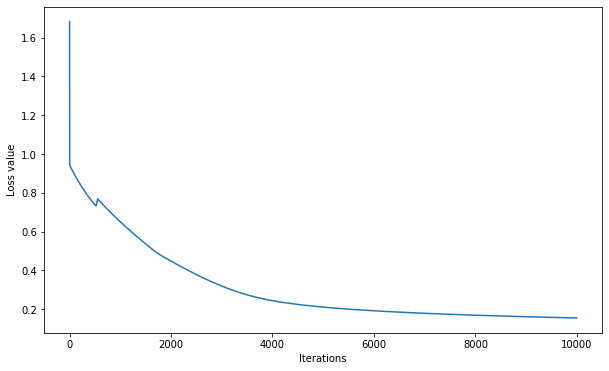

In [106]:
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_test)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

In [62]:
print(X_train.shape)
print(X_test.shape)
print(number_data_test)
print(number_data_train)
print(w.shape)

(200, 100)
(200, 100)
200
200
(100, 200)


# **[Output] Plot the Training data**

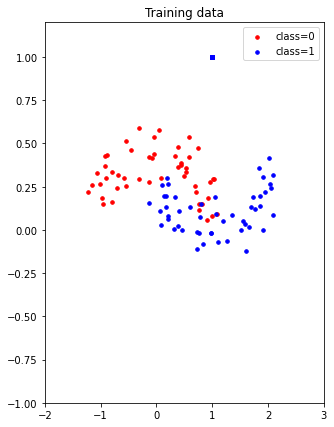

In [23]:
plt.figure(1,figsize=(5,7))
plt.scatter(idx_class0_train[:,0], idx_class0_train[:,1], s=50, c='r', marker='.', label='class=0') 
plt.scatter(idx_class1_train[:,0], idx_class1_train[:,1], s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend(loc = 'best')
plt.xlim([-2,3])
plt.ylim([-1,1.2])
plt.show()

# **[Output] Plot the Testing data**

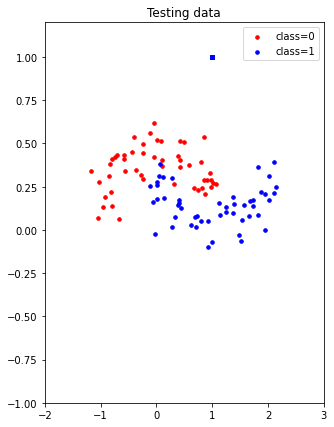

In [24]:
plt.figure(1,figsize=(5,7))
plt.scatter(idx_class0_test[:,0], idx_class0_test[:,1], s=50, c='r', marker='.', label='class=0') 
plt.scatter(idx_class1_test[:,0], idx_class1_test[:,1], s=50, c='b', marker='.', label='class=1')
plt.title('Testing data')
plt.legend(loc = 'best')
plt.xlim([-2,3])
plt.ylim([-1,1.2])
plt.show()

# **[Output] Plot the learning curve with $\lambda$ = 0.00001**

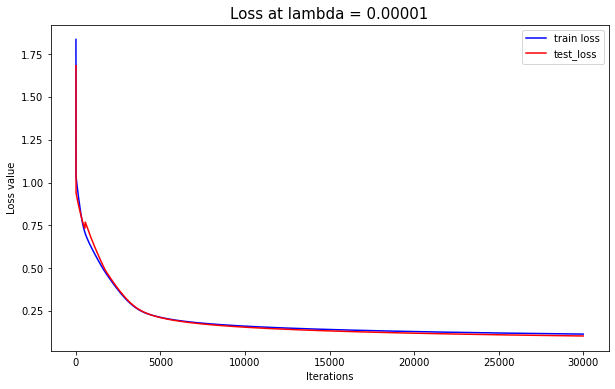

In [113]:
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train, c = 'blue', label = "train loss")
plt.plot(np.array(range(max_iter)), L_iters_test, c = 'red', label = "test_loss")
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.title("Loss at lambda = 0.00001", fontsize = 15)
plt.legend(loc = 'best')
plt.show()

# **[Output] Plot the learning curve with $\lambda$ = 0.0001**

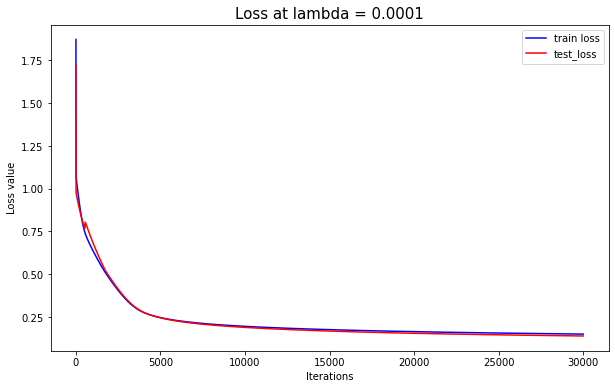

In [115]:
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train, c = 'blue', label = "train loss")
plt.plot(np.array(range(max_iter)), L_iters_test, c = 'red', label = "test_loss")
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.title("Loss at lambda = 0.0001", fontsize = 15)
plt.legend(loc = 'best')
plt.show()

# **[Output] Plot the learning curve with $\lambda$ = 0.001**

In [ ]:
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train, c = 'blue', label = "train loss")
plt.plot(np.array(range(max_iter)), L_iters_test, c = 'red', label = "test_loss")
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.title("Loss at lambda = 0.001", fontsize = 15)
plt.legend(loc = 'best')
plt.show()

# **[Output] Plot the learning curve with $\lambda$ = 0.01**

In [ ]:
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train, c = 'blue', label = "train loss")
plt.plot(np.array(range(max_iter)), L_iters_test, c = 'red', label = "test_loss")
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.title("Loss at lambda = 0.01", fontsize = 15)
plt.legend(loc = 'best')
plt.show()

# **[Output] Plot the learning curve with $\lambda$ = 0.1**

In [ ]:
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train, c = 'blue', label = "train loss")
plt.plot(np.array(range(max_iter)), L_iters_test, c = 'red', label = "test_loss")
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.title("Loss at lambda = 0.1", fontsize = 15)
plt.legend(loc = 'best')
plt.show()

# **[Output] Plot the probability map of the obtained classifier with $\lambda$ = 0.00001**

# **[Output] Plot the probability map of the obtained classifier with $\lambda$ = 0.0001**

# **[Output] Plot the probability map of the obtained classifier with $\lambda$ = 0.001**

# **[Output] Plot the probability map of the obtained classifier with $\lambda$ = 0.01**

# **[Output] Plot the probability map of the obtained classifier with $\lambda$ = 0.1**

# **Print the final training accuracy with the given regularization parameters**

# **Print the final testing accuracy with the given regularization parameters**